<a href="https://colab.research.google.com/github/HOSSENkhodadadi/Data_Science_Labs_Process_Methods/blob/main/Data_Science_Labs_Process_Methods/FinalProject/finalProjectUsingCNN%26MFCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
audio_dataset_path='F:\myPolito\DSL\Final Project'
import pandas as pd
import os
import librosa
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

file_path = '/content/drive/My Drive/DSL_Final_Project/development.csv'
metadata = pd.read_csv(file_path)
metadata.head()

Mounted at /content/drive


,Id,path,speakerId,action,object,Self-reported fluency level,First Language spoken,Current language used for work/school,gender,ageRange
0,0,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/0a312...,2BqVo8kVB2Skwgyb,change language,none,advanced,English (United States),English (United States),female,22-40
1,1,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/0ee42...,2BqVo8kVB2Skwgyb,activate,music,advanced,English (United States),English (United States),female,22-40
2,2,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/1d9f3...,2BqVo8kVB2Skwgyb,deactivate,lights,advanced,English (United States),English (United States),female,22-40
3,3,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/269fc...,2BqVo8kVB2Skwgyb,increase,volume,advanced,English (United States),English (United States),female,22-40
4,4,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/5bbda...,2BqVo8kVB2Skwgyb,increase,volume,advanced,English (United States),English (United States),female,22-40


In [ ]:
import tensorflow as tf


In [ ]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
audio_lengthes =[]
audios = []
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join('/content/drive/My Drive/DSL_Final_Project',str(row["path"]))
    
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_best') 
    audios.append(audio)
    labels = row["action"] + " " + row["object"]
    audio_lengthes.append([len(audio), labels])

9854it [39:33,  4.15it/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
audio_lengthes_df = pd.DataFrame(audio_lengthes)
header = ["length","class"]
audio_lengthes_df.columns = header

In [ ]:
audio_lengthes_df

,length,class
0,40961,change language none
1,30720,activate music
2,43009,deactivate lights
3,38912,increase volume
4,53248,increase volume
...,...,...
9849,60212,decrease volume
9850,58330,deactivate lights
9851,58330,deactivate lights
9852,50804,deactivate lights


In [ ]:
grouped_df = audio_lengthes_df.groupby("class")

In [ ]:
import matplotlib.pyplot as plt

Content = []
Class = []
for length, classs in grouped_df:
    print(classs)
    print(length)
    Class.append(classs)
    Content.append(length)

      length           class
1      30720  activate music
12     32768  activate music
13     28672  activate music
14     30720  activate music
63     38912  activate music
...      ...             ...
9818   36864  activate music
9834   40961  activate music
9835   36864  activate music
9836   38912  activate music
9848   58330  activate music

[791 rows x 2 columns]
activate music
      length                 class
0      40961  change language none
47     32768  change language none
48     49153  change language none
49     55296  change language none
50     36864  change language none
...      ...                   ...
9815   40961  change language none
9816   38912  change language none
9817   30720  change language none
9845   34816  change language none
9847   52685  change language none

[1113 rows x 2 columns]
change language none
      length              class
2      43009  deactivate lights
15     55296  deactivate lights
52     40961  deactivate lights
55    441000  deact

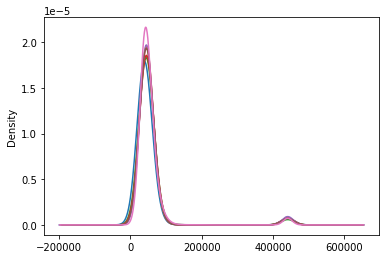

In [ ]:
for label in Content:
    ih = grouped_df.get_group(label)
    ih["length"].plot(kind='kde')

In [ ]:
Content

['activate music',
 'change language none',
 'deactivate lights',
 'decrease heat',
 'decrease volume',
 'increase heat',
 'increase volume']

In [ ]:
audio_lengthes_df["length"]

0       40961
1       30720
2       43009
3       38912
4       53248
        ...  
9849    60212
9850    58330
9851    58330
9852    50804
9853    62093
Name: length, Length: 9854, dtype: int64

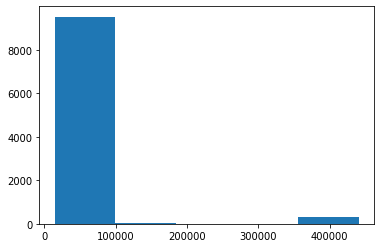

In [ ]:
import matplotlib.pyplot as plt

plt.hist(audio_lengthes_df["length"], bins=5)
plt.show()

In [ ]:
import numpy as np
# calculate quartiles
quartile_1, quartile_3 = np.percentile(audio_lengthes_df["length"], [25, 75])

# calculate interquartile range
iqr = quartile_3 - quartile_1

# identify outliers
outliers = []
for i in audio_lengthes_df["length"]:
    if i < (quartile_1 - 1.5 * iqr) or i > (quartile_3 + 1.5 * iqr):
        outliers.append(i)

print("Outliers: ", outliers)

Outliers:  [86016, 86016, 108544, 441000, 441000, 83968, 102401, 86016, 441000, 441000, 441000, 441000, 82791, 84672, 441000, 441000, 86554, 441000, 441000, 441000, 441000, 95962, 77147, 441000, 79028, 77147, 92198, 441000, 441000, 441000, 441000, 441000, 178177, 441000, 79872, 94209, 86016, 441000, 94209, 441000, 83968, 81920, 441000, 79028, 80909, 441000, 84672, 441000, 441000, 441000, 80909, 441000, 441000, 79028, 441000, 80909, 441000, 441000, 441000, 441000, 80909, 441000, 441000, 441000, 441000, 441000, 441000, 441000, 441000, 77147, 88436, 441000, 441000, 441000, 83968, 441000, 441000, 441000, 441000, 441000, 441000, 441000, 441000, 441000, 441000, 441000, 441000, 441000, 79028, 441000, 441000, 80909, 79028, 441000, 441000, 441000, 101607, 441000, 441000, 441000, 441000, 441000, 441000, 441000, 441000, 441000, 441000, 441000, 95962, 441000, 83968, 79872, 79872, 441000, 441000, 143360, 441000, 81920, 81920, 98305, 441000, 441000, 441000, 83968, 159744, 441000, 441000, 441000, 441

In [ ]:
print(quartile_3 + 1.5 * iqr)


76670.5


In [ ]:
outlier_mask = audio_lengthes_df["length"]>76670
outlier_mask

0       False
1       False
2       False
3       False
4       False
        ...  
9849    False
9850    False
9851    False
9852    False
9853    False
Name: length, Length: 9854, dtype: bool

In [ ]:
outlier_mask_df =pd.DataFrame(outlier_mask) 
type(outlier_mask_df)

pandas.core.frame.DataFrame

In [ ]:
outlier_mask_df.head

<bound method NDFrame.head of       length
0      False
1      False
2      False
3      False
4      False
...      ...
9849   False
9850   False
9851   False
9852   False
9853   False

[9854 rows x 1 columns]>

In [ ]:

import csv
filename = "outlier_mask.csv"
with open(filename, 'w', newline='') as csvfile:
    # Creating a CSV writer object
    csvwriter = csv.writer(csvfile)

    # Writing the column headers and data rows
    csvwriter.writerows(outlier_mask_df)

In [ ]:
dff = metadata
dff.drop(dff[outlier_mask].index, inplace=True)
dff.shape

(9295, 10)

In [ ]:
metadata[:40]

,Id,path,speakerId,action,object,Self-reported fluency level,First Language spoken,Current language used for work/school,gender,ageRange
0,0,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/0a312...,2BqVo8kVB2Skwgyb,change language,none,advanced,English (United States),English (United States),female,22-40
1,1,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/0ee42...,2BqVo8kVB2Skwgyb,activate,music,advanced,English (United States),English (United States),female,22-40
2,2,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/1d9f3...,2BqVo8kVB2Skwgyb,deactivate,lights,advanced,English (United States),English (United States),female,22-40
3,3,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/269fc...,2BqVo8kVB2Skwgyb,increase,volume,advanced,English (United States),English (United States),female,22-40
4,4,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/5bbda...,2BqVo8kVB2Skwgyb,increase,volume,advanced,English (United States),English (United States),female,22-40
5,5,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/6436a...,2BqVo8kVB2Skwgyb,decrease,volume,advanced,English (United States),English (United States),female,22-40
6,6,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/6a1cd...,2BqVo8kVB2Skwgyb,increase,heat,advanced,English (United States),English (United States),female,22-40
7,7,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/72160...,2BqVo8kVB2Skwgyb,increase,heat,advanced,English (United States),English (United States),female,22-40
8,8,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/74d26...,2BqVo8kVB2Skwgyb,decrease,heat,advanced,English (United States),English (United States),female,22-40
9,9,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/77cb5...,2BqVo8kVB2Skwgyb,decrease,heat,advanced,English (United States),English (United States),female,22-40


In [ ]:
# remove later
def preprocess(file_path, label): 
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    audio = audio[:76670]
    zero_padding = tf.zeros([76670] - tf.shape(audio), dtype=tf.float32)
    audio = tf.concat([zero_padding, wav],0)
    return spectrogram, label

   # spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    #spectrogram = tf.abs(spectrogram)
    #spectrogram = tf.expand_dims(spectrogram, axis=2)

In [ ]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    audio = audio[:76670]
    zero_padding = tf.zeros([76670] - tf.shape(audio), dtype=tf.float32)
    audio = tf.concat([audio, zero_padding ],0)
    audio = np.array(audio)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
       
    return mfccs_features

In [ ]:
def features_extractors(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
       
    return mfccs_features

In [ ]:
    file_name = os.path.join('/content/drive/My Drive/DSL_Final_Project',"dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/269fc210-4474-11e9-a9a5-5dbec3b8816a.wav")
    print(file_name)


/content/drive/My Drive/DSL_Final_Project/dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/269fc210-4474-11e9-a9a5-5dbec3b8816a.wav


In [ ]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]

#remove this
keeper = metadata[:50]

for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join('/content/drive/My Drive/DSL_Final_Project',str(row["path"]))
    final_class_labels=row["action"] +" "+ row["object"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

9295it [06:48, 22.78it/s]


In [ ]:
#print(extracted_features)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()


,feature,class
0,"[[-729.049, -721.04285, -734.43567, -747.6961,...",change language none
1,"[[-775.2468, -773.01746, -749.923, -711.9694, ...",activate music
2,"[[-814.97595, -806.9605, -812.215, -800.7104, ...",deactivate lights
3,"[[-721.30536, -721.30536, -717.48987, -712.690...",increase volume
4,"[[-772.1147, -776.286, -785.64465, -775.66644,...",increase volume


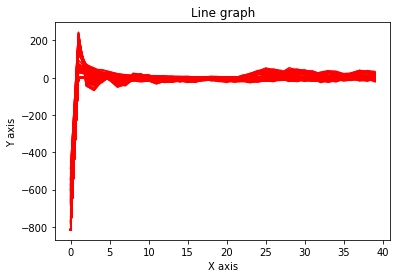

In [ ]:
x = extracted_features_df["feature"][5]
import matplotlib.pyplot as plt
 
# data to be plotted

 
# plotting
plt.title("Line graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, color ="red")
plt.show()

In [ ]:
extracted_features_df.iloc[100,0].shape

(40, 150)

In [ ]:
extracted_features_df.shape

(9295, 2)

In [ ]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [ ]:
X.shape

(9295, 40, 150)

In [ ]:
X = X.reshape(9295,40,150,1)


In [ ]:
y.shape

(9295,)

In [ ]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
y.shape

(9295, 7)

In [ ]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=10, shuffle = True )

In [ ]:
#X_train
X_train.shape

(7436, 40, 150, 1)

In [ ]:
X_test.shape

(1859, 40, 150, 1)

In [ ]:
y_train.shape

(7436, 7)

In [ ]:
import keras
from keras.layers import Activation, Dense, Dropout, Conv2D,Flatten, MaxPooling2D
from keras.models import Sequential

In [ ]:
model = Sequential()
input_shape=(40, 150, 1)

model.add(Conv2D(24, (2, 2), strides=(1, 1), input_shape=input_shape))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (2, 2), padding="valid"))
model.add(MaxPooling2D((2, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (2, 2), padding="valid"))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.2))

#model.add(Dense(32))
#model.add(Activation('relu'))
#model.add(Dropout(rate=0.2))


model.add(Dense(7))
model.add(Activation("softmax"))

In [ ]:
model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 39, 149, 24)       120       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 19, 74, 24)       0         
 g2D)                                                            
                                                                 
 activation_51 (Activation)  (None, 19, 74, 24)        0         
                                                                 
 conv2d_31 (Conv2D)          (None, 18, 73, 48)        4656      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 5, 36, 48)        0         
 g2D)                                                            
                                                                 
 activation_52 (Activation)  (None, 5, 36, 48)       

In [ ]:
from keras.callbacks import TensorBoard, ModelCheckpoint
tensorboard = TensorBoard(log_dir='/content/drive/My Drive/DSL_Final_Project/Logs/logC24_C48-C48_D64_7_4')

# Define the checkpointer
checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/DSL_Final_Project/bestModels/Conv2D_24_48_48_Dense_64_model_4.h5', 
                               verbose=1, save_best_only=True)

In [ ]:
model.compile(
	optimizer="Adam",
	loss="binary_crossentropy",
	metrics=['accuracy'])

history = model.fit(
	x=X_train, 
	y=y_train,
    epochs=100,
    batch_size=8,
    validation_data= (X_test, y_test),
    callbacks=[tensorboard, checkpointer])

score = model.evaluate(
	x=X_test,
	y=y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Save the model
model.save('/content/drive/My Drive/DSL_Final_Project/savedModels/Conv2D_32_48_48_Dense_64_3model.h5')

Epoch 1/100
929/930 [============================>.] - ETA: 0s - loss: 0.4353 - accuracy: 0.2746
Epoch 1: val_loss improved from inf to 0.33904, saving model to /content/drive/My Drive/DSL_Final_Project/bestModels/Conv2D_24_48_48_Dense_64_model_4.h5
930/930 [==============================] - 43s 45ms/step - loss: 0.4352 - accuracy: 0.2746 - val_loss: 0.3390 - val_accuracy: 0.3599
Epoch 2/100
930/930 [==============================] - ETA: 0s - loss: 0.3527 - accuracy: 0.3650
Epoch 2: val_loss improved from 0.33904 to 0.33242, saving model to /content/drive/My Drive/DSL_Final_Project/bestModels/Conv2D_24_48_48_Dense_64_model_4.h5
930/930 [==============================] - 42s 45ms/step - loss: 0.3527 - accuracy: 0.3650 - val_loss: 0.3324 - val_accuracy: 0.4034
Epoch 3/100
929/930 [============================>.] - ETA: 0s - loss: 0.3307 - accuracy: 0.4062
Epoch 3: val_loss improved from 0.33242 to 0.30886, saving model to /content/drive/My Drive/DSL_Final_Project/bestModels/Conv2D_24_48

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


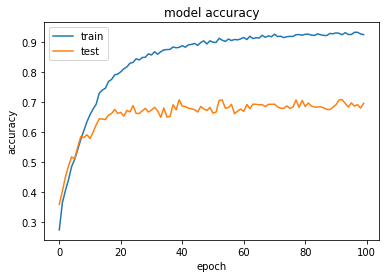

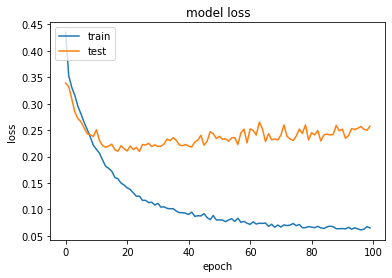

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# remove this later
def predict(name):
    b, fs = librosa.core.load(name)
    ps = librosa.feature.melspectrogram(b, sr=fs)
    S_DB = librosa.power_to_db(ps, ref=np.max)
    test = S_DB.reshape(1,128,217,1)
    return model.predict(test)

In [ ]:
file_path = '/content/drive/My Drive/DSL_Final_Project/evaluation.csv'
evaluation = pd.read_csv(file_path)
evaluation.head()

,Id,path,speakerId,Self-reported fluency level,First Language spoken,Current language used for work/school,gender,ageRange
0,0,dsl_data/audio/speakers/NgQEvO2x7Vh3xy2xz/f53c...,NgQEvO2x7Vh3xy2xz,native,English (United States),English (United States),male,22-40
1,1,dsl_data/audio/speakers/k5bqyxx2lzIbrlg9/1d5f8...,k5bqyxx2lzIbrlg9,native,English (United States),English (United States),male,22-40
2,2,dsl_data/audio/speakers/7B4XmNppyrCK977p/1c0d5...,7B4XmNppyrCK977p,native,English (United States),English (United States),male,41-65
3,3,dsl_data/audio/speakers/k5bqyxx2lzIbrlg9/275c3...,k5bqyxx2lzIbrlg9,native,English (United States),English (United States),male,22-40
4,4,dsl_data/audio/speakers/V4ZbwLm9G5irobWn/b7c7a...,V4ZbwLm9G5irobWn,native,English (United States),English (United States),female,41-65


In [ ]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    audio = audio[:76670]
    zero_padding = tf.zeros([76670] - tf.shape(audio), dtype=tf.float32)
    audio = tf.concat([audio, zero_padding ],0)
    audio = np.array(audio)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
       
    return mfccs_features

In [ ]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]

for index_num,row in tqdm(evaluation.iterrows()):
    file_name = os.path.join('/content/drive/My Drive/DSL_Final_Project',str(row["path"]))
    data=features_extractor(file_name)
    extracted_features.append([data])


1455it [01:05, 22.29it/s]


In [ ]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature'])
extracted_features_df.head()


,feature
0,"[[-617.2023, -617.2023, -617.2023, -617.2023, ..."
1,"[[-549.2558, -528.61554, -531.20276, -543.3042..."
2,"[[-701.62256, -701.41895, -701.2874, -701.6225..."
3,"[[-603.5141, -571.7804, -526.16187, -506.65253..."
4,"[[-567.13184, -505.84366, -481.97388, -484.483..."


In [ ]:
X=np.array(extracted_features_df['feature'].tolist())


In [ ]:
X.shape

(1455, 40, 150)

In [ ]:
X = X.reshape(1455,40,150,1)

In [ ]:
predictions = model.predict(X)

46/46 [==============================] - 2s 39ms/step


In [ ]:

keeper[:5]

array([[1.3777605e-01, 1.0802567e-03, 1.7808184e-02, 2.5666850e-03,
        8.2379222e-01, 3.9539309e-03, 1.3022625e-02],
       [5.7830317e-11, 8.2350217e-11, 4.8076248e-15, 7.1415633e-01,
        2.3007053e-10, 2.8584364e-01, 1.2221391e-08],
       [1.2644914e-06, 2.1883264e-09, 1.3596197e-05, 6.0382355e-03,
        3.2835435e-06, 9.9200737e-01, 1.9362353e-03],
       [3.7030749e-02, 6.5080345e-02, 1.5073991e-01, 2.7981726e-02,
        3.4908926e-01, 1.6337080e-02, 3.5374099e-01],
       [1.0561818e-05, 4.2278715e-03, 2.3700539e-05, 1.4527120e-04,
        9.9397588e-01, 1.1466024e-05, 1.6052715e-03]], dtype=float32)

In [ ]:
predictions = np.argmax(keeper, axis=-1)
predictions[:25]

array([4, 3, 5, 6, 4, 5, 6, 2, 3, 2, 3, 3, 2, 4, 3, 2, 1, 3, 4, 1, 1, 4,
       6, 4, 4])

In [ ]:

predicted_classes = labelencoder.inverse_transform(predictions)


In [ ]:
predicted_classes

array(['decrease volume', 'decrease heat', 'increase heat', ...,
       'increase heat', 'decrease heat', 'activate music'], dtype='<U20')

In [ ]:
 id = np.arange(0, len(finalEval)-1)

In [ ]:
finalEval= pd.DataFrame(predicted_classes)


array([   0,    1,    2, ..., 1452, 1453, 1454])

In [ ]:
finalEval.to_csv("finalEval.csv", columns = ["Id", "Predicted"])

KeyError: ignored

In [ ]:
df = pd.DataFrame([x for x in range(len(predicted_classes))], columns=['Id'])
df.head()

,Id
0,0
1,1
2,2
3,3
4,4


In [ ]:
df['Predicted'] = predicted_classes
df.head()

,Id,Predicted
0,0,decrease volume
1,1,decrease heat
2,2,increase heat
3,3,increase volume
4,4,decrease volume


In [ ]:
# Python3 code to remove whitespace
def remove(string):
    return string.replace(" ", "")
     
# Driver Program
string = ' g e e k '
print(remove(string))

geek


In [ ]:
def replace_space(string):

  if string != 'changelanguagenone':
    return string.replace(' ', '')
  else:
    return 'change languagenone'

In [ ]:
df['Predicted'] = df.apply(lambda r: replace_space(r['Predicted']), axis=1)

In [ ]:
df

,Id,Predicted
0,0,decreasevolume
1,1,decreaseheat
2,2,increaseheat
3,3,increasevolume
4,4,decreasevolume
...,...,...
1450,1450,change languagenone
1451,1451,increasevolume
1452,1452,increaseheat
1453,1453,decreaseheat


In [ ]:
df.to_csv('final.csv', index=False)